In [1]:
# import needed package
import pandas as pd 
import numpy as np 
from IESEGRecSys.Functions import *
from ieseg import *
from sklearn.model_selection import train_test_split
import surprise

In [2]:
# read data
Artists = pd.read_table('Artists.dat')
tags=pd.read_table('tags.dat')
user_artists = pd.read_table('user_artists.dat')
user_taggedartists = pd.read_table('user_taggedartists.dat')

In [3]:
Artists.head()

id               name                                         url  \
0   1       MALICE MIZER       http://www.last.fm/music/MALICE+MIZER   
1   2    Diary of Dreams    http://www.last.fm/music/Diary+of+Dreams   
2   3  Carpathian Forest  http://www.last.fm/music/Carpathian+Forest   
3   4       Moi dix Mois       http://www.last.fm/music/Moi+dix+Mois   
4   5        Bella Morte        http://www.last.fm/music/Bella+Morte   

                                          pictureURL  
0    http://userserve-ak.last.fm/serve/252/10808.jpg  
1  http://userserve-ak.last.fm/serve/252/3052066.jpg  
2  http://userserve-ak.last.fm/serve/252/40222717...  
3  http://userserve-ak.last.fm/serve/252/54697835...  
4  http://userserve-ak.last.fm/serve/252/14789013...

In [4]:
tags

tagID           tagValue
0          1              metal
1          2  alternative metal
2          3          goth rock
3          4        black metal
4          5        death metal
...      ...                ...
11941  12644              suomi
11942  12645          symbiosis
11943  12646            sverige
11944  12647               eire
11945  12648     electro latino

[11946 rows x 2 columns]

In [5]:
user_artists

userID  artistID  weight
0           2        51   13883
1           2        52   11690
2           2        53   11351
3           2        54   10300
4           2        55    8983
...       ...       ...     ...
92829    2100     18726     337
92830    2100     18727     297
92831    2100     18728     281
92832    2100     18729     280
92833    2100     18730     263

[92834 rows x 3 columns]

In [6]:
user_taggedartists

userID  artistID  tagID  day  month  year
0            2        52     13    1      4  2009
1            2        52     15    1      4  2009
2            2        52     18    1      4  2009
3            2        52     21    1      4  2009
4            2        52     41    1      4  2009
...        ...       ...    ...  ...    ...   ...
186474    2100     16437      4    1      7  2010
186475    2100     16437    292    1      5  2010
186476    2100     16437   2087    1      7  2010
186477    2100     16437   2801    1      5  2010
186478    2100     16437   3335    1      7  2010

[186479 rows x 6 columns]

In [7]:
content_based_data = user_taggedartists.merge(tags, on="tagID", how = 'left')
content_based_data

userID  artistID  tagID  day  month  year                 tagValue
0            2        52     13    1      4  2009                 chillout
1            2        52     15    1      4  2009                downtempo
2            2        52     18    1      4  2009               electronic
3            2        52     21    1      4  2009                 trip-hop
4            2        52     41    1      4  2009         female vovalists
...        ...       ...    ...  ...    ...   ...                      ...
186474    2100     16437      4    1      7  2010              black metal
186475    2100     16437    292    1      5  2010                     folk
186476    2100     16437   2087    1      7  2010   depressive black metal
186477    2100     16437   2801    1      5  2010                dark folk
186478    2100     16437   3335    1      7  2010  atmospheric black metal

[186479 rows x 7 columns]

In [8]:
#User based Collaborative Filtering

In [9]:
R5 = user_artists[user_artists['weight']>=1000]

In [10]:
R5

userID  artistID  weight
0           2        51   13883
1           2        52   11690
2           2        53   11351
3           2        54   10300
4           2        55    8983
...       ...       ...     ...
92793    2100      1134    1213
92794    2100      1260    1459
92795    2100      1276    1133
92803    2100      4271    2026
92812    2100      8324    1068

[14075 rows x 3 columns]

In [11]:
R5['rating']=5

<ipython-input-11-86ed0eaaf1d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R5['rating']=5


In [12]:
R5

userID  artistID  weight  rating
0           2        51   13883       5
1           2        52   11690       5
2           2        53   11351       5
3           2        54   10300       5
4           2        55    8983       5
...       ...       ...     ...     ...
92793    2100      1134    1213       5
92794    2100      1260    1459       5
92795    2100      1276    1133       5
92803    2100      4271    2026       5
92812    2100      8324    1068       5

[14075 rows x 4 columns]

In [13]:
R4 = user_artists[(user_artists['weight']<1000)&(user_artists['weight']>=500)]

In [14]:
R4['rating']=4

<ipython-input-14-87ac77b61eee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R4['rating']=4


In [15]:
R4

userID  artistID  weight  rating
51          3       102     662       4
101         4        53     686       4
109         4       153     903       4
110         4       154     826       4
111         4       155     777       4
...       ...       ...     ...     ...
92820    2100      8533     724       4
92821    2100      9783     793       4
92823    2100     10894     705       4
92826    2100     13978     535       4
92828    2100     18725     758       4

[14111 rows x 4 columns]

In [16]:
R3 = user_artists[(user_artists['weight']<500)&(user_artists['weight']>=300)]

In [17]:
R3['rating']=3

<ipython-input-17-0f38a06bdf72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R3['rating']=3


In [18]:
R2 = user_artists[(user_artists['weight']<300)&(user_artists['weight']>=100)]

In [19]:
R2['rating']=2

<ipython-input-19-0577924f1504>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R2['rating']=2


In [20]:
R1 = user_artists[(user_artists['weight']<100)&(user_artists['weight']>=0)]

In [21]:
R1['rating']=1

<ipython-input-21-29a440d8526d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1['rating']=1


In [22]:
R5 = R5.drop('weight' , axis = 1)
R4 = R4.drop('weight' , axis = 1)
R3 = R3.drop('weight' , axis = 1)
R2 = R2.drop('weight' , axis = 1)
R1 = R1.drop('weight' , axis = 1)

In [23]:
user_based_data=pd.concat([R5,R4,R3,R2,R1])

In [24]:
partitions = partition(dataFrame = user_based_data, splitStrategy = [0.7,0.3])

In [25]:
train = partitions[0]
test     = partitions[1]

In [26]:
print('------ Train ------')
print('Nr items:', len(train.artistID.unique()))
print('Nr users:', len(train.userID.unique()))

print('\n------ Test ------')
print('Nr items:', len(test.artistID.unique()))
print('Nr users:', len(test.userID.unique()))

print('\nNr new items:', len(set(test.artistID).symmetric_difference(set(train.artistID))))
print('Nr new users:', len(set(test.userID).symmetric_difference(set(train.userID))))

------ Train ------
Nr items: 14208
Nr users: 1889

------ Test ------
Nr items: 8281
Nr users: 1884

Nr new items: 12775
Nr new users: 11


In [27]:
from surprise import Dataset
from surprise import Reader

# set up reader with min rating and max rating as arguments
reader = Reader(rating_scale=(1, 5))

# surprise training and test set
df_train = Dataset.load_from_df(train, reader).build_full_trainset()
df_test = list(test.itertuples(index=False, name=None))

In [28]:
from surprise import KNNBasic

# set option to cosine similarity and user-based collaborative filtering
options = {'name':'pearson', 'user_based':True}

# select 15 most similar users (min 5)
ub = KNNBasic(k=15, min_k=5, sim_options=options)

# fit on training set
ub.fit(df_train)

# predict
ub_pred = ub.test(df_test)
df_ub_pred = pd.DataFrame(ub_pred)

Computing the pearson similarity matrix...
Done computing similarity matrix.


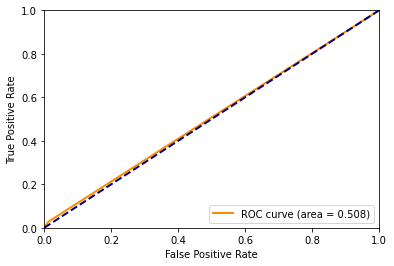

User_based_15
RMSE            1.380886
MAE             1.197027
Recall          0.027998
Precision       0.501044
F1              0.053033
AUC             0.507800
NDCG            0.898858

In [29]:
ub_res1 = prediction_metrics(df_ub_pred.est, df_ub_pred.r_ui)
ub_res2 = classification_metrics(df_ub_pred.est, df_ub_pred.r_ui,4)
ub_res3 = ranking_metrics(df_ub_pred, threshold=4, topn=10)

# append results
ub_res = ub_res1.append(ub_res2).append(ub_res3).rename(columns={'value':'User_based_15'})
ub_res

In [30]:
#KFold

In [31]:
from surprise import Dataset
from surprise import Reader
from surprise import BaselineOnly, SlopeOne,KNNBasic, NormalPredictor
from surprise import accuracy
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms.baseline_only import BaselineOnly

In [32]:
data=Dataset.load_from_df(
    train, reader)

In [33]:
# define the k-fold iterator, k=10
kf = KFold(n_splits=10,random_state = 123)
for trainset, testset in kf.split(data):
    # train and predict
    ub.fit(trainset)
    predictions = ub.test(testset)
    # RMSE
    accuracy.rmse(predictions, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3584
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3693
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3513
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3674
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3657
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3654
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3754
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3714
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3692
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3795


In [34]:
np.mean(accuracy.rmse(predictions, verbose=True))

RMSE: 1.3795


1.3794826245737646

In [35]:
#Item based Collaborative Filtering

In [36]:
# set option to pearson correlation and item-based collaborative filtering
options = {'name':'pearson', 'user_based':False}

# select 15 most similar items (min 1)
ib = KNNBasic(k=15, min_k=5, sim_options=options)

# fit on training set
ib.fit(df_train)

# predict
ib_pred = ib.test(df_test)
df_ib_pred = pd.DataFrame(ib_pred)

Computing the pearson similarity matrix...
Done computing similarity matrix.


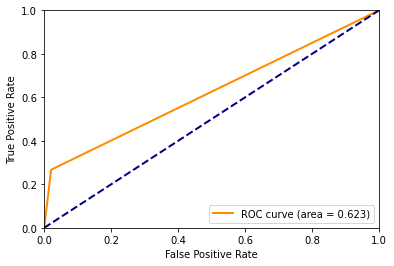

Item_based_15
RMSE            1.175969
MAE             0.960413
Recall          0.267149
Precision       0.851935
F1              0.406750
AUC             0.623252
NDCG            0.847990

In [37]:
ib_res1 = prediction_metrics(df_ib_pred.est, df_ib_pred.r_ui)
ib_res2 = classification_metrics(df_ib_pred.est, df_ib_pred.r_ui,4)
ib_res3 = ranking_metrics(df_ib_pred, threshold=4, topn=10)
ib_res = ib_res1.append(ib_res2).append(ib_res3).rename(columns={'value':'Item_based_15'})
ib_res

In [38]:
RMSE = []
# define the k-fold iterator, k=10
kf = KFold(n_splits=10,random_state = 123)
for trainset, testset in kf.split(data):
    # train and predict
    ib.fit(trainset)
    predictions = ib.test(testset)
    # RMSE
    rmse=accuracy.rmse(predictions, verbose=True)
    RMSE.append(rmse)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1789
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1961
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1834
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1849
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1928
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1837
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1907
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1932
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1812
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1892


In [39]:
np.mean(RMSE)

1.1874081652344803

In [40]:
#Matrix Factorization

In [41]:
from surprise import SVD

# select 20 factors and use probabilistic matrix factorization (no bias)
mf = SVD(n_factors=20, biased=False, random_state=42)

# fit on training set
mf.fit(df_train)

# predict
mf_pred = mf.test(df_test)
df_mf_pred = pd.DataFrame(mf_pred)

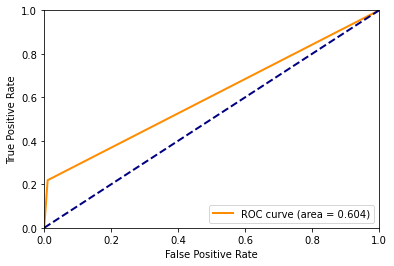

SVD_20
RMSE       1.261495
MAE        0.931694
Recall     0.218852
Precision  0.904532
F1         0.352433
AUC        0.604291
NDCG       0.856867

In [42]:
mf_res1 = prediction_metrics(df_mf_pred.est, df_mf_pred.r_ui)
mf_res2 = classification_metrics(df_mf_pred.est, df_mf_pred.r_ui,4)
mf_res3 = ranking_metrics(df_mf_pred, threshold=4, topn=10)
mf_res = mf_res1.append(mf_res2).append(mf_res3).rename(columns={'value':'SVD_20'})
mf_res

In [43]:
RMSE = []
# define the k-fold iterator, k=10
kf = KFold(n_splits=10,random_state = 123)
for trainset, testset in kf.split(data):
    # train and predict
    mf.fit(trainset)
    predictions = mf.test(testset)
    # RMSE
    rmse=accuracy.rmse(predictions, verbose=True)
    RMSE.append(rmse)

RMSE: 1.2651
RMSE: 1.2711
RMSE: 1.2902
RMSE: 1.2911
RMSE: 1.2666
RMSE: 1.2801
RMSE: 1.2838
RMSE: 1.2959
RMSE: 1.2900
RMSE: 1.2963


In [44]:
np.mean(RMSE)

1.2830234477843008

In [45]:
#Co-clustering (surprise package)

In [46]:
# restore our original train set
train = train[['userID', 'artistID', 'rating']]

In [47]:
from surprise import CoClustering

# select 10 user-based and 10 item based clusters
cocl = CoClustering(n_cltr_u=10, n_cltr_i=10, n_epochs=50, random_state=42)

# fit on training set
cocl.fit(df_train)

# predict
cocl_pred = cocl.test(df_test)
df_cocl_pred = pd.DataFrame(cocl_pred)

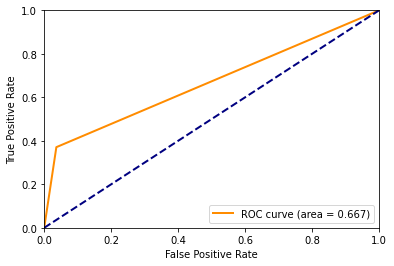

CoClust_10_10
RMSE            1.056285
MAE             0.815891
Recall          0.370859
Precision       0.819541
F1              0.510642
AUC             0.667274
NDCG            0.837637

In [48]:
cocl_res1 = prediction_metrics(df_cocl_pred.est, df_cocl_pred.r_ui)
cocl_res2 = classification_metrics(df_cocl_pred.est, df_cocl_pred.r_ui,4)
cocl_res3 = ranking_metrics(df_cocl_pred, threshold=4, topn=10)
cocl_res = cocl_res1.append(cocl_res2).append(cocl_res3).rename(columns={'value':'CoClust_10_10'})
cocl_res

In [49]:
RMSE = []
# define the k-fold iterator, k=10
kf = KFold(n_splits=10,random_state = 123)
for trainset, testset in kf.split(data):
    # train and predict
    cocl.fit(trainset)
    predictions = cocl.test(testset)
    # RMSE
    rmse=accuracy.rmse(predictions, verbose=True)
    RMSE.append(rmse)

RMSE: 1.0399
RMSE: 1.0498
RMSE: 1.0295
RMSE: 1.0466
RMSE: 1.0505
RMSE: 1.0400
RMSE: 1.0541
RMSE: 1.0566
RMSE: 1.0515
RMSE: 1.0562


In [50]:
np.mean(RMSE)

1.047475586062888

In [51]:
#Overview model performance (display the evaluation metrics for each algorithm in one DataFrame)

In [52]:
overview = pd.concat([ub_res, ib_res, mf_res, cocl_res], axis=1)
overview

User_based_15  Item_based_15    SVD_20  CoClust_10_10
RMSE            1.380886       1.175969  1.261495       1.056285
MAE             1.197027       0.960413  0.931694       0.815891
Recall          0.027998       0.267149  0.218852       0.370859
Precision       0.501044       0.851935  0.904532       0.819541
F1              0.053033       0.406750  0.352433       0.510642
AUC             0.507800       0.623252  0.604291       0.667274
NDCG            0.898858       0.847990  0.856867       0.837637

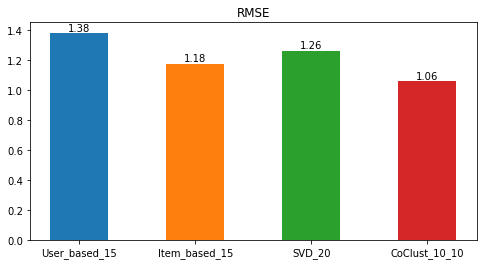

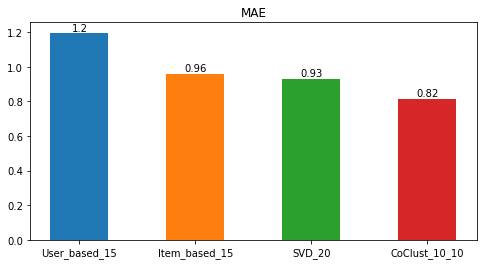

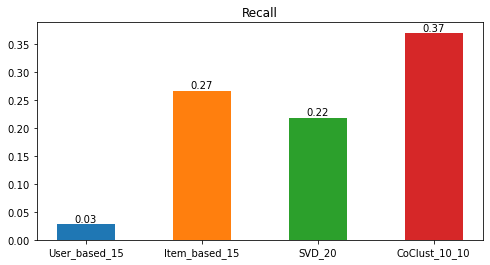

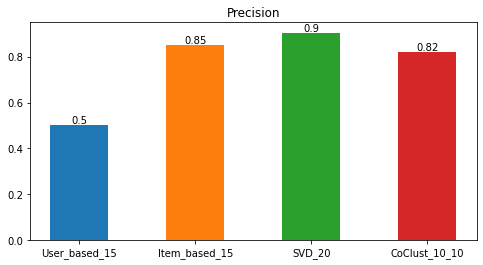

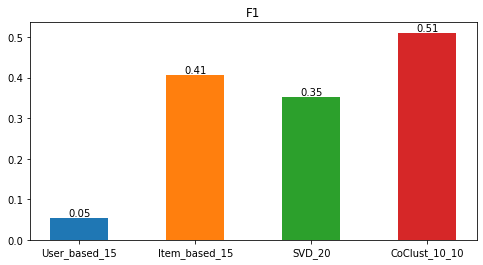

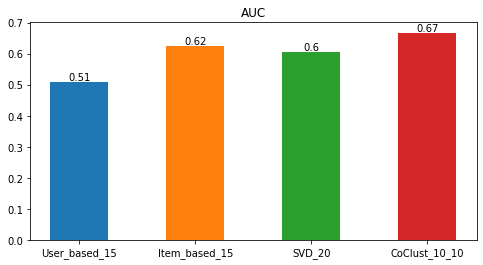

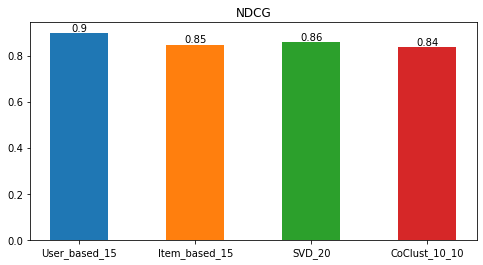

In [53]:
# simple visualization (Bar Chart)

width = .5

for j, row in enumerate(overview.index):
    fig, ax = plt.subplots(figsize=(8,4))
    x = np.arange(len(overview.columns))
    for i, col in enumerate(overview.columns):
        plt.bar(x[i], overview.iloc[j,i], width, label='col')
        ax.text(x[i], overview.iloc[j,i], str(round(overview.iloc[j,i],2)),
                ha='center', va='bottom')
    ax.set_xticks(x)
    ax.set_title(row)
    ax.set_xticklabels(overview.columns)
    plt.show()

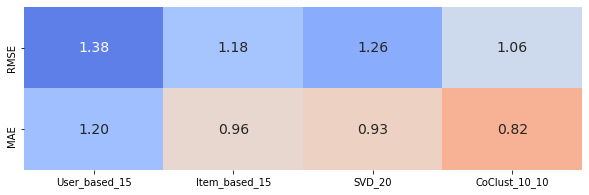

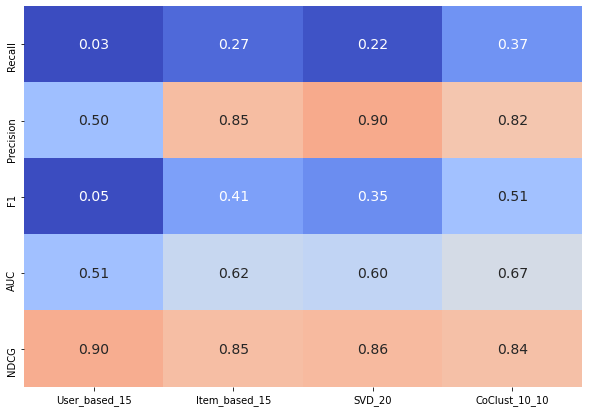

In [54]:
# simple visualization (Heatmap)

import seaborn as sns

# reverse color scale
fig = plt.figure(figsize=(10,3))
sns.heatmap(overview.iloc[:2,:], annot=True, cmap='coolwarm_r', fmt=".2f",annot_kws={'size':14}, cbar=False, vmin=0.5, vmax=1.5)
plt.show()

# normal color scale
fig = plt.figure(figsize=(10,7))
sns.heatmap(overview.iloc[2:,:], annot=True, cmap='coolwarm', fmt=".2f",annot_kws={'size':14}, cbar=False, vmin=0.2, vmax=1.2)
plt.show()

In [55]:
#content based

In [56]:
content_based_data

userID  artistID  tagID  day  month  year                 tagValue
0            2        52     13    1      4  2009                 chillout
1            2        52     15    1      4  2009                downtempo
2            2        52     18    1      4  2009               electronic
3            2        52     21    1      4  2009                 trip-hop
4            2        52     41    1      4  2009         female vovalists
...        ...       ...    ...  ...    ...   ...                      ...
186474    2100     16437      4    1      7  2010              black metal
186475    2100     16437    292    1      5  2010                     folk
186476    2100     16437   2087    1      7  2010   depressive black metal
186477    2100     16437   2801    1      5  2010                dark folk
186478    2100     16437   3335    1      7  2010  atmospheric black metal

[186479 rows x 7 columns]

In [196]:
cols = ['userID','artistID','tagValue']

In [197]:
content_based1 = content_based_data[cols]

In [198]:
content_based1

userID  artistID                 tagValue
0            2        52                 chillout
1            2        52                downtempo
2            2        52               electronic
3            2        52                 trip-hop
4            2        52         female vovalists
...        ...       ...                      ...
186474    2100     16437              black metal
186475    2100     16437                     folk
186476    2100     16437   depressive black metal
186477    2100     16437                dark folk
186478    2100     16437  atmospheric black metal

[186479 rows x 3 columns]

In [57]:
user_based_data

userID  artistID  rating
0           2        51       5
1           2        52       5
2           2        53       5
3           2        54       5
4           2        55       5
...       ...       ...     ...
92749    2099      4122       1
92756    2099      7060       1
92762    2099     16215       1
92782    2099     18723       1
92783    2099     18724       1

[92834 rows x 3 columns]

In [58]:
cols = ['artistID','rating']

In [59]:
content_based2 = user_based_data[cols]

In [60]:
content_based2

artistID  rating
0            51       5
1            52       5
2            53       5
3            54       5
4            55       5
...         ...     ...
92749      4122       1
92756      7060       1
92762     16215       1
92782     18723       1
92783     18724       1

[92834 rows x 2 columns]

In [62]:
data = pd.merge(content_based_data, content_based2, how = 'left' ,on='artistID')
data=data.drop_duplicates()

In [63]:
data

userID  artistID  tagID  day  month  year                 tagValue  \
0              2        52     13    1      4  2009                 chillout   
2              2        52     13    1      4  2009                 chillout   
6              2        52     13    1      4  2009                 chillout   
7              2        52     13    1      4  2009                 chillout   
13             2        52     13    1      4  2009                 chillout   
...          ...       ...    ...  ...    ...   ...                      ...   
10944150    2100     16437   2801    1      5  2010                dark folk   
10944151    2100     16437   2801    1      5  2010                dark folk   
10944152    2100     16437   3335    1      7  2010  atmospheric black metal   
10944153    2100     16437   3335    1      7  2010  atmospheric black metal   
10944154    2100     16437   3335    1      7  2010  atmospheric black metal   

          rating  
0            5.0  
2            4.0  
6            3.0  
7            2.0  
13           1.0  
...          ...  
10944150     2.0  
10944151     1.0  
10944152     3.0  
10944153     2.0  
10944154     1.0  

[677099 rows x 8 columns]

In [64]:
artistID_unique = data['artistID'].unique().tolist()

In [65]:
len(artistID_unique)

12523

In [66]:
# train-test split
train, test = train_test_split(data, test_size=0.3, random_state=42)

# reset index
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

print(data.shape)
print(train.shape)
print(test.shape)

(677099, 8)
(473969, 8)
(203130, 8)


In [70]:
data_pivot = data.pivot_table(index='artistID', values='rating', columns='userID').fillna(0)

In [71]:
data_pivot

userID    2     3     4     5     6     7     8     9     10    11    ...  \
artistID                                                              ...   
1          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
18737      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
18739      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
18740      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
18741      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
18744      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

userID    2090  2091  2092  2093  2094  2095  2096  2097  2099  2100  
artistID                                                              
1          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
18737      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
18739      0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0  
18740      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
18741      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
18744      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[12133 rows x 1891 columns]

In [193]:
data

userID  artistID                 tagValue  rating
0              2        52                 chillout     5.0
2              2        52                 chillout     4.0
6              2        52                 chillout     3.0
7              2        52                 chillout     2.0
13             2        52                 chillout     1.0
...          ...       ...                      ...     ...
10944150    2100     16437                dark folk     2.0
10944151    2100     16437                dark folk     1.0
10944152    2100     16437  atmospheric black metal     3.0
10944153    2100     16437  atmospheric black metal     2.0
10944154    2100     16437  atmospheric black metal     1.0

[677099 rows x 4 columns]

In [172]:
content_based = data

In [173]:
content_based

userID  artistID                 tagValue  rating
0              2        52                 chillout     5.0
2              2        52                 chillout     4.0
6              2        52                 chillout     3.0
7              2        52                 chillout     2.0
13             2        52                 chillout     1.0
...          ...       ...                      ...     ...
10944150    2100     16437                dark folk     2.0
10944151    2100     16437                dark folk     1.0
10944152    2100     16437  atmospheric black metal     3.0
10944153    2100     16437  atmospheric black metal     2.0
10944154    2100     16437  atmospheric black metal     1.0

[677099 rows x 4 columns]

In [174]:
content_based['num'] = 1

In [175]:
content_based

userID  artistID                 tagValue  rating  num
0              2        52                 chillout     5.0    1
2              2        52                 chillout     4.0    1
6              2        52                 chillout     3.0    1
7              2        52                 chillout     2.0    1
13             2        52                 chillout     1.0    1
...          ...       ...                      ...     ...  ...
10944150    2100     16437                dark folk     2.0    1
10944151    2100     16437                dark folk     1.0    1
10944152    2100     16437  atmospheric black metal     3.0    1
10944153    2100     16437  atmospheric black metal     2.0    1
10944154    2100     16437  atmospheric black metal     1.0    1

[677099 rows x 5 columns]

In [176]:
content_based = content_based.pivot_table(index='artistID',values='yes/no', columns='tagValue').fillna(0)

In [177]:
content_based

tagValue  '80s  -pearl fashion music  0 play yet   00  00's  007  00s  \
artistID                                                                
1          0.0                   0.0         0.0  0.0   0.0  0.0  0.0   
2          0.0                   0.0         0.0  0.0   0.0  0.0  0.0   
3          0.0                   0.0         0.0  0.0   0.0  0.0  0.0   
4          0.0                   0.0         0.0  0.0   0.0  0.0  0.0   
5          0.0                   0.0         0.0  0.0   0.0  0.0  0.0   
...        ...                   ...         ...  ...   ...  ...  ...   
18737      0.0                   0.0         0.0  0.0   0.0  0.0  0.0   
18739      0.0                   0.0         0.0  0.0   0.0  0.0  0.0   
18740      0.0                   0.0         0.0  0.0   0.0  0.0  0.0   
18741      0.0                   0.0         0.0  0.0   0.0  0.0  0.0   
18744      0.0                   1.0         0.0  0.0   0.0  0.0  0.0   

tagValue  00s rock    1  1008  ...  zikirli  zmiel pierogi  zmierzch  zombie  \
artistID                       ...                                             
1              0.0  0.0   0.0  ...      0.0            0.0       0.0     0.0   
2              0.0  0.0   0.0  ...      0.0            0.0       0.0     0.0   
3              0.0  0.0   0.0  ...      0.0            0.0       0.0     0.0   
4              0.0  0.0   0.0  ...      0.0            0.0       0.0     0.0   
5              0.0  0.0   0.0  ...      0.0            0.0       0.0     0.0   
...            ...  ...   ...  ...      ...            ...       ...     ...   
18737          0.0  0.0   0.0  ...      0.0            0.0       0.0     0.0   
18739          0.0  0.0   0.0  ...      0.0            0.0       0.0     0.0   
18740          0.0  0.0   0.0  ...      0.0            0.0       0.0     0.0   
18741          0.0  0.0   0.0  ...      0.0            0.0       0.0     0.0   
18744          0.0  0.0   0.0  ...      0.0            0.0       0.0     0.0   

tagValue  zombie rave  zombieland  zoocore  zornish  ztt   zu  
artistID                                                       
1                 0.0         0.0      0.0      0.0  0.0  0.0  
2                 0.0         0.0      0.0      0.0  0.0  0.0  
3                 0.0         0.0      0.0      0.0  0.0  0.0  
4                 0.0         0.0      0.0      0.0  0.0  0.0  
5                 0.0         0.0      0.0      0.0  0.0  0.0  
...               ...         ...      ...      ...  ...  ...  
18737             0.0         0.0      0.0      0.0  0.0  0.0  
18739             0.0         0.0      0.0      0.0  0.0  0.0  
18740             0.0         0.0      0.0      0.0  0.0  0.0  
18741             0.0         0.0      0.0      0.0  0.0  0.0  
18744             0.0         0.0      0.0      0.0  0.0  0.0  

[12523 rows x 9749 columns]

In [98]:
# Content based as a function

from numpy.linalg import norm

def simil_cosine(a,b):
    return np.dot(a, b)/(norm(a)*norm(b))


def ContentBased(content_data, test_data, NN):

    cdata = content_data.reset_index(drop=True).copy()

    # store user and item dimensions
    dim = cdata.shape[0]
    nr_user = cdata.shape[0]

    if test_data.shape[1] != dim:
        raise Exception('Dim. mismatch: Test data contains {} items, while Content contains {} items. Please make sure the columns of test and content match.'\
            .format(test_data.shape[1], dim))

    # similarity matrices
    matrix = np.zeros(shape=(dim, dim), dtype=np.float)
    matrixNN = np.zeros(shape=(dim, dim), dtype=np.float)

    # compute similarity
    for i, row in cdata.iterrows():
        for j, col in cdata.iterrows():
            if i <= j: continue
            else: matrix[i][j] = simil_cosine(np.array(row),np.array(col))

    # copy values to other diagonal
    matrix = matrix + matrix.T - np.diag(np.diag(matrix))

    print('Similarity calculation done...')

    # mask all values that are not nearest neighbors
    cutoff = lambda x,cv: x if x >= cv else 0.0
    v_cutoff = np.vectorize(cutoff)

    for i in range(dim):
        crit_val = -np.sort(-matrix[i])[NN-1]
        matrixNN[i] = v_cutoff(matrix[i], crit_val)

    print('Nearest neighbor selection done...')

    # predict user-item ratings in test_data
    prediction = np.zeros(shape=(nr_user, dim), dtype=np.float)

    for i in range(nr_user):
        num = np.matmul(np.array(test_data.iloc[i,:]), matrixNN)
        denom = matrixNN.sum(axis=0) # column sums
        prediction[i] = num/denom

    print('Prediction done...')

    # return DataFrame
    return pd.DataFrame(prediction, index=test_data.index, columns=test_data.columns)

In [ ]:
cb_pred = ContentBased(content_based, data_pivot, 10)

In [72]:
#Hybrid Recommendation Systems

In [73]:
# Combine predictions (mean)

df_hybrid = df_ib_pred.loc[:,df_ib_pred.columns != 'est']
df_hybrid['est'] = (np.array(df_cocl_pred['est']) + np.array(df_cocl_pred['est'])) / 2

df_hybrid.head()

uid  iid  r_ui                                            details       est
0    2   51     5          {'actual_k': 15, 'was_impossible': False}  5.000000
1    2   52     5  {'was_impossible': True, 'reason': 'Not enough...  4.542597
2    2   53     5          {'actual_k': 11, 'was_impossible': False}  5.000000
3    2   57     5  {'was_impossible': True, 'reason': 'Not enough...  4.504583
4    2   59     5          {'actual_k': 14, 'was_impossible': False}  4.495905

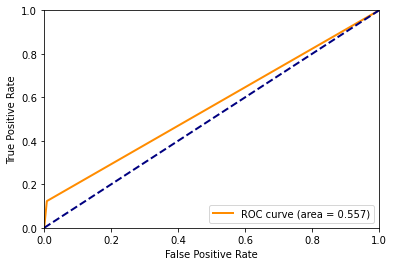

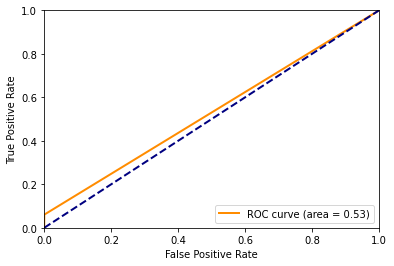

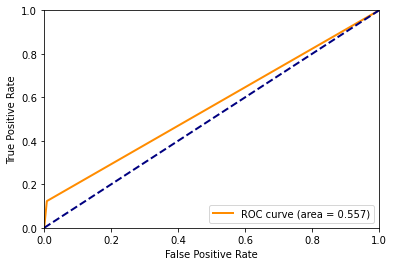

cocl  Item_based_15  Hybrid_CB_IB
RMSE       1.056285       1.175969      1.056285
MAE        0.815891       0.960413      0.815891
Recall     0.122811       0.060599      0.122811
Precision  0.742340       0.974074      0.742340
F1         0.210755       0.114100      0.210755
AUC        0.557471       0.530151      0.557471
NDCG       0.837637       0.847990      0.837637

In [76]:
# Evaluate 

cocl_res1 = prediction_metrics(df_cocl_pred.est, df_cocl_pred.r_ui)
cocl_res2 = classification_metrics(df_cocl_pred.est, df_cocl_pred.r_ui,5)
cocl_res3 = ranking_metrics(df_cocl_pred, threshold=5, topn=10)
cocl_res = cocl_res1.append(cocl_res2).append(cocl_res3).rename(columns={'value':'cocl'})

ib_res1 = prediction_metrics(df_ib_pred.est, df_ib_pred.r_ui)
ib_res2 = classification_metrics(df_ib_pred.est, df_ib_pred.r_ui,5)
ib_res3 = ranking_metrics(df_ib_pred, threshold=5, topn=10)
ib_res = ib_res1.append(ib_res2).append(ib_res3).rename(columns={'value':'Item_based_15'})

hb_res1 = prediction_metrics(df_hybrid.est, df_hybrid.r_ui)
hb_res2 = classification_metrics(df_hybrid.est, df_hybrid.r_ui,5)
hb_res3 = ranking_metrics(df_hybrid, threshold=5, topn=10)
hb_res = hb_res1.append(hb_res2).append(hb_res3).rename(columns={'value':'Hybrid_CB_IB'})

overview = pd.concat([cocl_res, ib_res, hb_res], axis=1)
overview

In [86]:
#Adding another Layer

In [78]:
# training set for Linear Regression model
lr_train = df_ib_pred[['r_ui', 'est']].rename(columns={'r_ui':'target', 'est':'ib_pred'})
lr_train['cocl_pred'] = df_cocl_pred['est']
lr_train.head()

target   ib_pred  cocl_pred
0       5  5.000000   5.000000
1       5  2.669657   4.542597
2       5  5.000000   5.000000
3       5  2.669657   4.504583
4       5  5.000000   4.495905

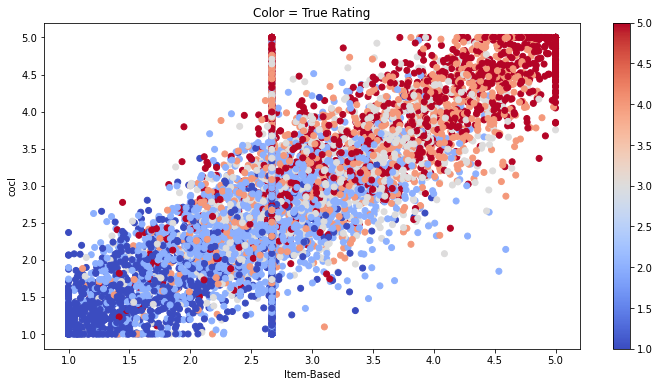

In [80]:
# visualize
scatter_df = lr_train.sample(10000, random_state=24)
plt.figure(figsize = (12, 6))
plt.scatter(x=scatter_df.ib_pred, y=scatter_df.cocl_pred, c=scatter_df.target, cmap='coolwarm')
plt.xlabel('Item-Based')
plt.ylabel('cocl')
plt.title('Color = True Rating')
plt.colorbar()

In [81]:
# Train Linear Regression model
from sklearn.linear_model import LinearRegression

X, y = lr_train.loc[:,lr_train.columns != 'target'], lr_train[['target']]

lr_model = LinearRegression().fit(X,y)

In [82]:
##### Hybrid - Linear Regression model
# get test set
lr_test = df_ib_pred[['r_ui', 'est']].rename(columns={'r_ui':'target', 'est':'ib_pred'})
lr_test['cocl_pred'] = df_ub_pred['est']
X_test, y_test = lr_test.loc[:,lr_test.columns != 'target'], lr_test[['target']]

# predict
lr_pred = lr_model.predict(X_test)

# transform in surprise format
df_lr = df_ib_pred.loc[:,df_ib_pred.columns != 'est']
df_lr['est'] = lr_pred

In [83]:
# Evaluate 
cocl_res = prediction_metrics(df_cocl_pred.est, df_cocl_pred.r_ui).rename(columns={'value':'cocl'})
ib_res = prediction_metrics(df_ib_pred.est, df_ib_pred.r_ui).rename(columns={'value':'Item_based_15'})
hb_res = prediction_metrics(df_hybrid.est, df_hybrid.r_ui).rename(columns={'value':'Hybrid_CB_IB'})
lr_res = prediction_metrics(df_lr.est, df_lr.r_ui).rename(columns={'value':'Hybrid_LR'})

overview2 = pd.concat([cocl_res, ib_res, hb_res, lr_res], axis=1)
overview2

cocl  Item_based_15  Hybrid_CB_IB  Hybrid_LR
RMSE  1.056285       1.175969      1.056285   1.272521
MAE   0.815891       0.960413      0.815891   1.099609

In [84]:
# copy lr train set
rf_train = lr_train.copy()
rf_train.head()

target   ib_pred  cocl_pred
0       5  5.000000   5.000000
1       5  2.669657   4.542597
2       5  5.000000   5.000000
3       5  2.669657   4.504583
4       5  5.000000   4.495905

In [85]:
from sklearn.ensemble import RandomForestRegressor

X, y = rf_train.loc[:,rf_train.columns != 'target'], rf_train[['target']]

# fit random forest model
rf_model = RandomForestRegressor(max_depth=4, n_estimators=100).fit(X,y)

<ipython-input-85-aaffaa3abd7b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestRegressor(max_depth=4, n_estimators=100).fit(X,y)


In [86]:
# predict
rf_pred = rf_model.predict(X_test)

# transform in surprise format
df_rf = df_ib_pred.loc[:,df_ib_pred.columns != 'est']
df_rf['est'] = rf_pred

In [87]:
# Evaluate
rf_res = prediction_metrics(df_rf.est, df_rf.r_ui).rename(columns={'value':'Hybrid_RF'})

In [88]:
# Display Overview
overview3 = pd.concat([cocl_res, ib_res, hb_res, lr_res, rf_res], axis=1)
overview3

cocl  Item_based_15  Hybrid_CB_IB  Hybrid_LR  Hybrid_RF
RMSE  1.056285       1.175969      1.056285   1.272521   1.317839
MAE   0.815891       0.960413      0.815891   1.099609   1.109267